In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [88]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)

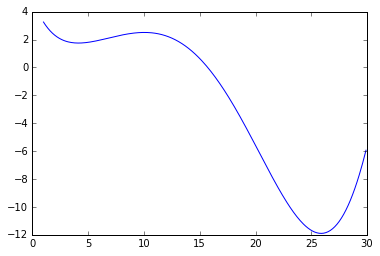

In [89]:
x_plt = np.arange(1, 30, 0.1)
plt.plot(x_plt, f(x_plt))
plt.show()

Default min, different starting points result in different local minima

In [76]:
print([
    optimize.minimize(f, 0., bounds = [(1, 30)]).x,
    optimize.minimize(f, (10,), bounds = ((1, 30),)).x,
    optimize.minimize(f, (25,), bounds = ((1, 30),)).x
])

[array([ 4.13628821]), array([ 4.13628818]), array([ 25.88018554])]


BFGS ends up in local minima

In [91]:
print(
    round(optimize.minimize(f, 2., method = 'BFGS').fun, 2),
    round(optimize.minimize(f, 30., method = 'BFGS').fun, 2)
)

(1.75, -11.9)


Differential evolution does not

In [72]:
print(
    optimize.differential_evolution(f, [(1, 30)])
)

     fun: array([-11.89889467])
     jac: array([ 0.])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([ 25.88019281])


But takes more work, event with few function arguments

In [86]:
bfgs = optimize.minimize(f, 30., method = 'BFGS')
diffev = optimize.differential_evolution(f, [(1, 30)])
print([
    [bfgs.nit, bfgs.nfev],
    [diffev.nit, diffev.nfev]
])

[[5, 18], [5, 98]]


With natural numbers

In [100]:
def h(x):
    return np.int_(np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.))

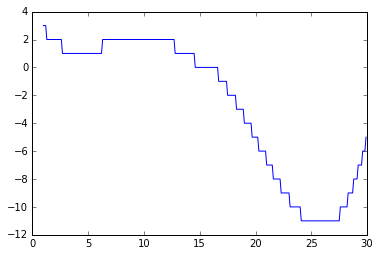

In [101]:
x_plt = np.arange(1, 30, 0.1)
plt.plot(x_plt, h(x_plt))
plt.show()

In [102]:
optimize.minimize(h, 30., method = 'BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])

In [103]:
optimize.differential_evolution(h, [(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([ 25.55158893])